In [ ]:
import gym
print(gym.__version__)

0.26.2


In [3]:
#Test Github saves

In [ ]:
env = gym.make("InvertedDoublePendulum-v4", render_mode="human")
env.action_space.seed(42)


[42]

In [ ]:
import numpy as np

# def plt_update(ax, colors=['b']):
#     x = np.linspace(0,1,100)
#     if ax.lines:
#         for line in ax.lines:
#             line.set_xdata(x)
#             y = np.random.random(size=(100,1))
#             line.set_ydata(y)
#     else:
#         for color in colors:
#             y = np.random.random(size=(100,1))
#             ax.plot(x, y, color)
#     fig.canvas.draw()


def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    # for label,data in data_dict.items():
    obs = data_dict["obs"]
    preds = data_dict["preds"]
    print("obs: ", obs, "\n preds: ",preds)

    plt.plot(obs, label="obs")
    plt.plot(range(len(obs)-1, len(obs)+len(preds)-1), preds, label="preds")
    
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

obs:  [0.06910398758900094, 0.31205414505223705, 0.6057666253314717, 0.8350131490515694] 
 preds:  [0.83501315 1.03501315 1.03501315 1.03501315]


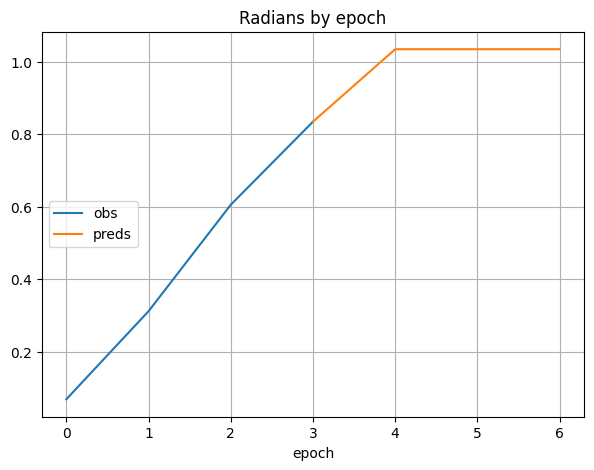

[0.06910398758900094, 0.31205414505223705, 0.6057666253314717, 0.8350131490515694]
Prediction error in last 3 steps:  0.7469222995894953


In [ ]:
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt

observation, info = env.reset(seed=42)
obs_history = []

# fig,ax = plt.subplots(1,1)
# ax.set_xlabel('t')
# ax.set_ylabel('obs_idx_1')
# ax.set_xlim(0,20)
# ax.set_ylim(-5,5)

for _ in range(10):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    obs_history.append(observation[1])
    # plt.plot(obs_history[0][0])
    # plt.show()
    preds = obs_history[-1]+[0, 0.2,0.2,0.2]
    # obs_concat_preds = obs_history
    # for pred in preds:
    #     obs_concat_preds.append(pred)
    live_plot({"obs": obs_history, "preds": preds}, title="Radians by epoch")
    time.sleep(0.5)
    if terminated or truncated:
        print(obs_history)
        print("Prediction error in last 3 steps: ", forecast_error(obs_history[-3:], preds[-3:]))
        break
        # obs_history = []
        # observation, info = env.reset()

env.close()

The episode ends when any of the following happens:

Truncation: The episode duration reaches 1000 timesteps.

Termination: Any of the state space values is no longer finite.

Termination: The absolutely value of the vertical angle between the pole and the cart is greater than 0.2 radian. i.e. 11.4592 degrees

1; vertical angle of the pole on the cart; -Inf; Inf; angle (rad)

*JTBD*

- Run thousands of episodes to generate training data with features (current and prev angles and other data) and labels (next few angles)
- Train forecast model to predict trajectory of angle
- Start episode with control over speed i.e. time lag between steps
- Predict expected time to end of episode at step t with measure of uncertainty
- Predict trajectory of angle in next few time steps at step t
- At end of episode output prediction errors at a few time steps


In [ ]:
# naive forecaster where we predict the angle at the next 3 steps is the same as the current angle

def naive_forecaster(X):
    # X is the all data known to the forecaster at the time. X is only the current and previous angles for now.
    
    current_angle = X[-1]
    angle_t_plus_1 = current_angle
    angle_t_plus_2 = current_angle
    angle_t_plus_3 = current_angle
    
    return np.array([angle_t_plus_1, angle_t_plus_2, angle_t_plus_3])


In [ ]:
print(obs_history)
naive_preds = naive_forecaster(np.array(obs_history[:5]))
print(naive_preds)

[-0.12295486613788503, -0.2592954944181627, -0.2673239561749348, -0.17937398398780446, 0.02871376748047718, 0.33976307541640566, 0.6274163281457733, 0.8519210184350943, 0.16073366138620068, 0.4217626427173906]
[0.02871377 0.02871377 0.02871377]


In [ ]:
# get forecast error given a predicted trajectory and observations

def forecast_error(X_obs, preds):
    
    mse = sum(np.square(X_obs - preds))
    
    return mse

In [ ]:
forecast_error(obs_history[-3:], naive_preds)

0.8495868487361393